Graph Convolutional Networks by [**Moussa Jamor**](https://github.com/JamorMoussa)

# Semi-Supervised Classification with GCN

**Graph Convolutional Networks (GCN)** is graph-base neural network
architecture introduced by *Thomas N. Kipf* and *Max Welling* in their paper ti-
tled [<u>Semi-Supervised Classification with Graph Convolutional Networks</u>](https://arxiv.org/pdf/1609.02907v4.pdf) in 2017. As they mentioned in their paper, that this proposed architecture
is an effecient variant of Convolution Neural Network (CNN), and It’s the first-
order approximation of spectral graph convoltions.

## CGN Layers

In their paper [[2]](https://arxiv.org/pdf/1609.02907v4.pdf), *Thomas N. Kipf* and *Max Welling* introduce the concept of multi-layer graph convolutional networks (GCNs). They propose a layer-wise propagation rule defined by the equation $A$:

$$
    H^{(l+1)} = \sigma\left(\widetilde{D}^{-\frac{1}{2}} \widetilde{A} \widetilde{D}^{-\frac{1}{2}} H^{(l)} W^{(l)}\right)
$$


## Linear Transformation in GCNs

Neural networks are constructed with an input layer, hidden layers (often many), and an output layer. Hidden layers typically consist of linear layers (although not always) followed by an activation function to introduce non-linearity. The linear layer is defined as:

$$
    y = XW
$$

where $X$ is the feature matrix and $W$ is the learnable weight matrix updated during backpropagation. Since Graph Convolutional Networks (GCNs) are based on neural network architectures, this term is present in Equation:

$$
\begin{equation}
    y = H^{(l)}W^{(l)}
\end{equation}
$$

where $H^{(l)}$ is obtained by stacking all feature vectors for each node horizontally, and $W^{(l)}$ is the learnable weight matrix.

<center>

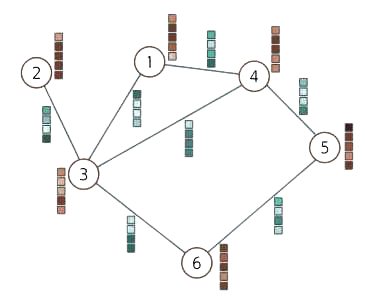

Grpah and Node Embeddings
</center>

## Adjacency Matrix

The adjacency matrix is a square matrix A where its elements are defined
by:

$$
    a_{ij} = \begin{cases}
                1 & \text{if } v_i \text{ and } v_j \text{ are adjacent}\\
                0 & \text{otherwise} 
             \end{cases}
$$

The adjacency matrix A has some properties:

- **Squared Matrix:** The adjacency matrix is always squared because each
vertex is compared to all other vertices in the graph, resulting in a square
matrix.

- **Symmetric Matrix:** If the graph is undirected, the adjacency matrix is
symmetric because if $v_i$ is adjacent to $v_j$ , then $v_j$ is also adjacent to $v_i$.

In Equation above, the authors use $\widetilde{A}$, which is defined as:

$$
    \widetilde{A} = A + I_N
$$

Here, $N$ denotes the number of nodes in the graph. The addition of $I_N$ to the adjacency matrix is done to add a self-connection for every node within the graph.

## Degree Matrix

The **Degree Matrix** is a diagonal matrix containing the number of edges attached to each vertex. Formally, it is defined as:

$$
\begin{equation}
    \widetilde{D}_{ij} = \begin{cases}
        d_i = \deg(v_i) & \text{if }i=j \\
        0 & \text{otherwise} 
    \end{cases}
\end{equation}
$$

Alternatively, the $\widetilde{D}$ matrix can be expressed using the $\widetilde{A}$ adjacency matrix as:

$$
\begin{equation}
    \widetilde{D}_{ij} = \begin{cases}
        \sum_{j}^{} \widetilde{A}_{ij} & \text{if } i=j\\
        0 & \text{otherwise}
    \end{cases}
\end{equation}
$$

So the matrix in compact form is as follows:

$$
\begin{equation}
    \widetilde{D} = \begin{bmatrix}
        d_1 = \deg{v_1} & \cdots & 0 & \cdots & 0 \\
        \vdots & \ddots & & \ddots  & \vdots \\
        0 & \cdots & d_i = \deg{v_i} & \cdots & 0 \\
        \vdots & \ddots  &  & \ddots & \vdots \\
        0 & \cdots & 0 & \cdots & d_N = \deg{v_N} \\
    \end{bmatrix}
\end{equation}
$$

In first equation, we don't have $\widetilde{D}$. Instead, we have $\widetilde{D}^{-\frac{1}{2}}$, which is defined as:

$$
\begin{equation}
    \widetilde{D}^{-\frac{1}{2}}_{ij} = \begin{cases}
        \frac{1}{\sqrt{d_i}} & \text{if }i=j\\
        0 & \text{otherwise}
    \end{cases}
\end{equation}
$$

Thus, the compact form is:

$$
\begin{equation}
    \widetilde{D}^{-\frac{1}{2}} = \begin{bmatrix}
        \frac{1}{\sqrt{d_1}} & \cdots & 0 & \cdots & 0 \\
        \vdots & \ddots & & \ddots  & \vdots \\
        0 & \cdots & \frac{1}{\sqrt{d_i}} & \cdots & 0 \\
        \vdots & \ddots  &  & \ddots & \vdots \\
        0 & \cdots & 0 & \cdots & \frac{1}{\sqrt{d_N}}  \\
    \end{bmatrix}
\end{equation}
$$

## Normalized Adjacency Matrix

The normalized adjacency matrix is denoted as $\hat{A}$ and is defined as follows: 

$$
\begin{equation}
    \hat{A} = \widetilde{D}^{-\frac{1}{2}}(A + I_N)\widetilde{D}^{-\frac{1}{2}} = \widetilde{D}^{-\frac{1}{2}}\widetilde{A}\widetilde{D}^{-\frac{1}{2}}
\end{equation}
$$

Normalizing the adjacency matrix $\widetilde{A}$ helps avoid numerical instabilities and issues such as **exploding and vanishing gradients** when used in a deep neural network model.

## Message Passing

The \textbf{Message Passing} refers to the process updating node representation in graph-based, on information from neighboring nodes. This operation, is performed when multiply the normalized adjacency matrix $\hat{A}$ with feature matrix $H^{(l)}$. Formally, 

$$
\begin{equation}
    X^{(l)} = \hat{A}H^{(l)} = \widetilde{D}^{-\frac{1}{2}}\widetilde{A}\widetilde{D}^{-\frac{1}{2}}H^{(l)}
\end{equation}
$$

## Activation Function

After performing the **Message Passing**, we multiply the $X^{(l)}$ matrix with a trained weight matrix $W^{(l)}$, which is going to be updated during back-propagation. Finally, we apply a differentiable activation function $\sigma$, which adds some sort of non-linearity to the network. So, the final result is:

$$
\begin{equation}
    H^{(l+1)} = \sigma\left(\hat{A}H^{(l)} W^{(l)}\right) = \sigma\left(\widetilde{D}^{-\frac{1}{2}} \widetilde{A} \widetilde{D}^{-\frac{1}{2}} H^{(l)} W^{(l)}\right)
\end{equation}
$$

## Reference 

- *Thomas N. Kipf and Max Welling.* : [<u>Semi-Supervised Classification with Graph Convolutional Networks</u>](https://arxiv.org/pdf/1609.02907v4.pdf), 2017.

- [<u> Why do graph convolutional neural networks use normalized adjacency matrices?</u>](https://stats.stackexchange.com/questions/589593/why-do-graph-convolutional-neural-networks-use-normalized-adjacency-matrices)